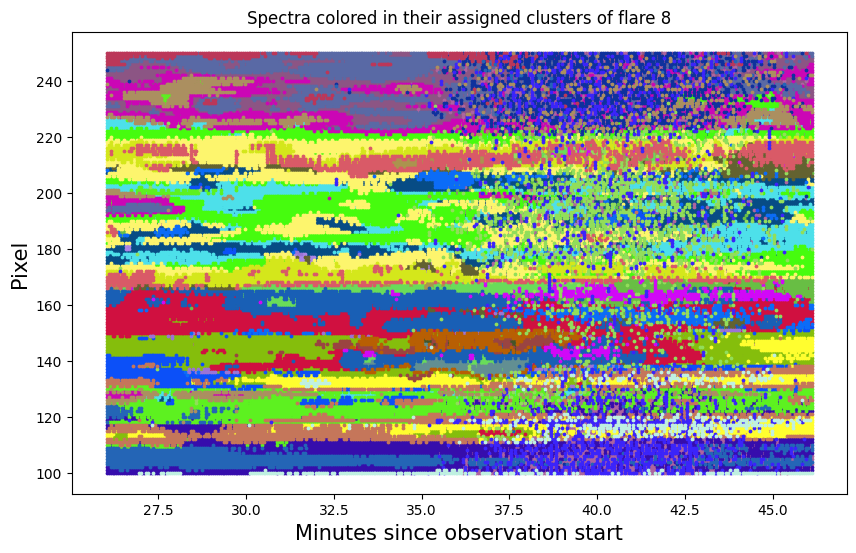

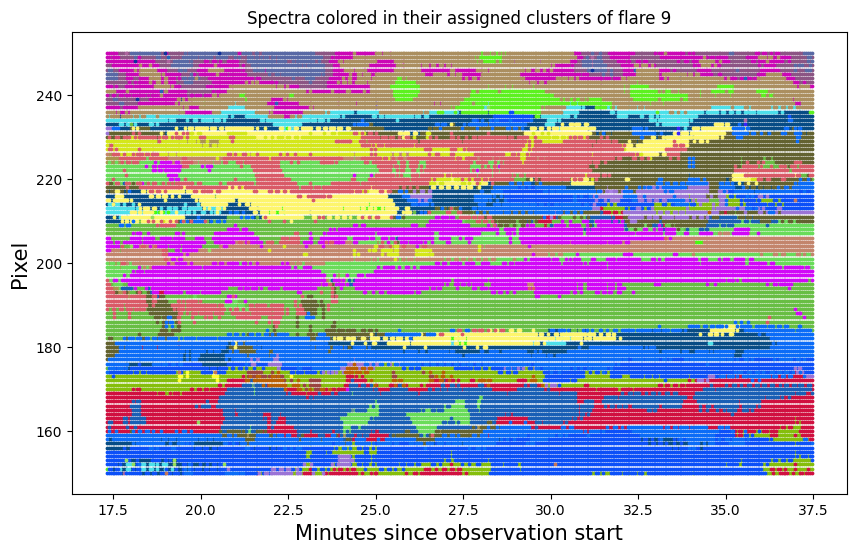

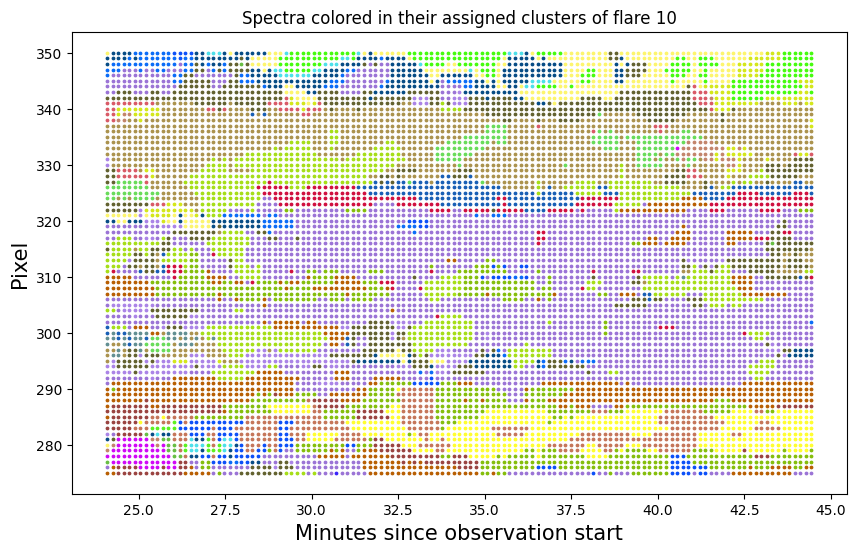

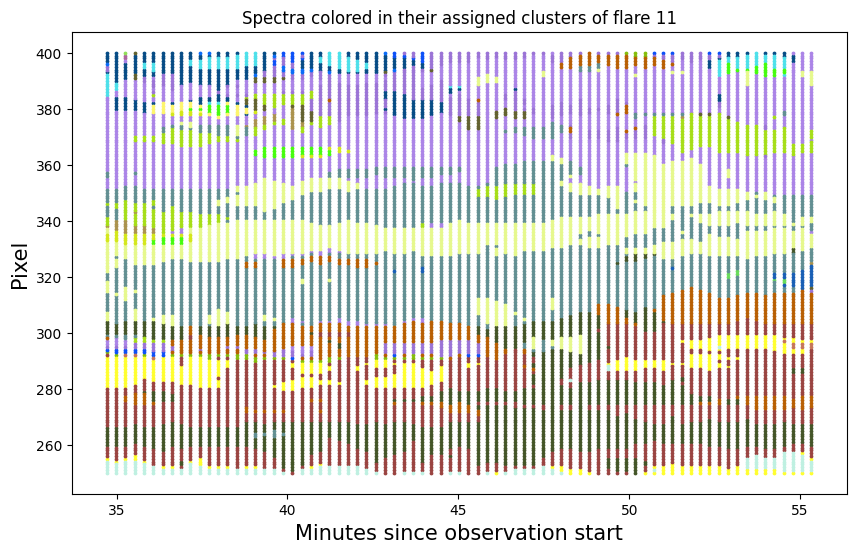

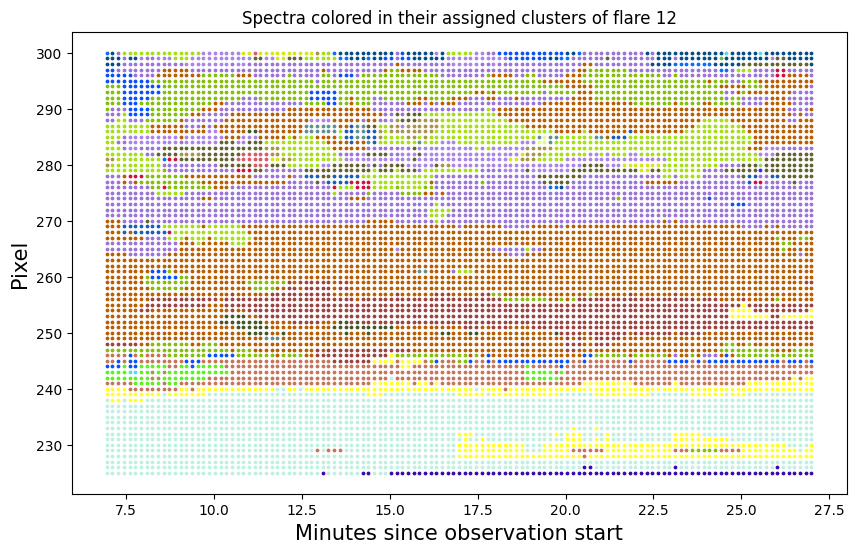

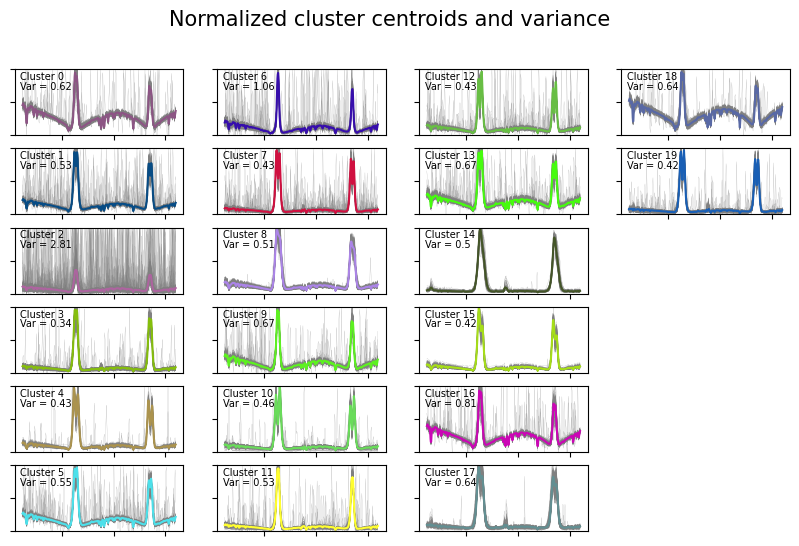

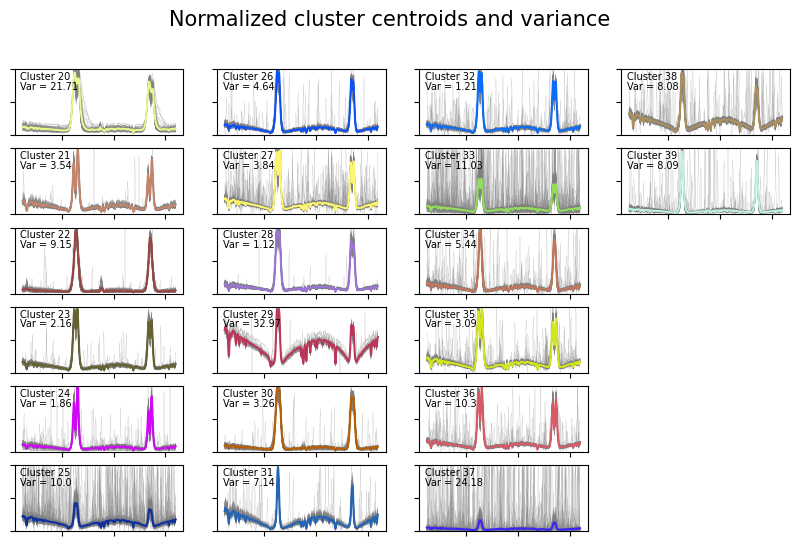

In [12]:
import matplotlib.pyplot as plt
import irisreader as ir
from irisreader import observation
ir.config.verbosity_level=0
import numpy as np
import os
from scipy.optimize import curve_fit
import time
import random as rdm



def Plotting(N, Time, fl_spectra_norm, t_data, y_data, labels, n_groups):
    t_newlist = []
    y_newlist = []
    Timelist = []
    #start = time.time()
    for n in range(n_groups):
        templist_t = []
        templist_y = []
        Timelist_0 = []
        for i in range(len(t_data)):
                if labels[i] == n:
                    templist_t.append(t_data[i])
                    Timelist_0.append(Time[t_data[i]])
                    templist_y.append(y_data[i])
        t_newlist.append(templist_t)    
        y_newlist.append(templist_y) 
        Timelist.append(Timelist_0)    
    fl_new = []
    for n in range(n_groups):  
        fl_temp = []
        a1 = 0
        for i in range(len(fl_spectra_norm)):
            if labels[i] == n:
                fl_temp.append(fl_spectra_norm[i])
                a1 = a1 + 1
        fl_new.append(fl_temp)
    plt.figure(dpi=100)
    for n in range(n_groups):
        #plt.scatter(t_newlist[n], y_newlist[n], s = 3, color=colors[n], label='C'+str(n), )
        plt.scatter(Timelist[n], y_newlist[n], s = 3, color=colors[n], label='C'+str(n), )
    plt.title('Spectra colored in their assigned clusters of flare ' +str(N))
    #plt.xlabel('Timestep')
    plt.xlabel('Minutes since observation start', fontsize=15)
    plt.ylabel('Pixel', fontsize=15)
    #plt.legend()
    plt.show()

def Clustering(fl_spectra_norm, labels, centroids, xax, n_past):
    centroid = centroids[n_past:n_past+20]
    n_groups = len(centroid)
    index1 = int(np.sqrt(n_groups))
    index2 = int(n_groups/index1) + 1
    n = 0
    i1 = 0
    i2 = 0
    fig, ax = plt.subplots(index2, index1, dpi=100)
    #plt.title('Centroids of '+str(n_groups)+' Clusters')
    fig.set_dpi(100)
    fig.suptitle('Normalized cluster centroids and variance', fontsize=15)  
    while n < n_groups:
        counter = 0
        variance = 0

        for i in range(len(fl_spectra_norm)):
            if labels[i] == n +n_past:
                dist = 0
                counter += 1
                diff = fl_spectra_norm[i] - centroids[n,:]
                for j in range(len(diff)):
                    dist += diff[j]**2
                variance += dist
                if counter%10 == 0:
                    ax[i2, i1].plot(xax, fl_spectra_norm[i], 'grey', linewidth=0.1)
        
        ax[i2, i1].plot(xax, centroids[n+n_past,:], colors[n+n_past])
        ax[i2, i1].text(2791, 0.85, 'Cluster ' + str(n+n_past), fontsize = 7)
        ax[i2, i1].text(2791, 0.7, 'Var = '+str(round(variance/(counter - 1), 2)), fontsize = 7)
        ax[i2, i1].tick_params('x', labelbottom=False)
        ax[i2, i1].tick_params('y', labelleft=False)
        ax[i2, i1].set_ylim(0,1)
        i2 += 1
        n += 1
        if i2 == index2:
            i2 = 0
            i1 += 1
    while n < index1*index2:
        ax[i2, i1].remove()
        i2 += 1
        n += 1
        if i2 == index2:
            i2 = 0
            i1 += 1
    plt.show()



'''

%store -r fl_norm_M2
%store -r xax_M2
%store -r path_M2
%store -r labels_M2
%store -r t_data_M2
%store -r y_data_M2
%store -r fl_spectra_norm_M2
%store -r centroids_M2
%store -r Time_M2
%store -r colors_M2

fl_norm = fl_norm_M2
xax = xax_M2
path = path_M2
labels = labels_M2
t_data = t_data_M2
y_data = y_data_M2
fl_spectra_norm = fl_spectra_norm_M2
centroids = centroids_M2
Time = Time_M2
colors = colors_M2



%store -r fl_norm_X
%store -r xax_X
%store -r path_X
%store -r labels_X
%store -r t_data_X
%store -r y_data_X
%store -r fl_spectra_norm_X
%store -r centroids_X
%store -r Time_X
%store -r colors_X

fl_norm = fl_norm_X
xax = xax_X
path = path_X
labels = labels_X
t_data = t_data_X
y_data = y_data_X
fl_spectra_norm = fl_spectra_norm_X
centroids = centroids_X
Time = Time_X
colors = colors_X



%store -r fl_norm_M
%store -r xax_M
%store -r path_M
%store -r labels_M
%store -r t_data_M
%store -r y_data_M
%store -r fl_spectra_norm_M
%store -r centroids_M
%store -r Time_M
%store -r colors_M

fl_norm = fl_norm_M
xax = xax_M
path = path_M
labels = labels_M
t_data = t_data_M
y_data = y_data_M
fl_spectra_norm = fl_spectra_norm_M
centroids = centroids_M
Time = Time_M
colors = colors_M

'''

%store -r fl_norm_C
%store -r xax_C
%store -r path_C
%store -r labels_C
%store -r t_data_C
%store -r y_data_C
%store -r y_data_C
%store -r fl_spectra_norm_C
%store -r centroids_C
%store -r Time_C
%store -r colors_C

fl_norm = fl_norm_C
xax = xax_C
path = path_C
labels = labels_C
t_data = t_data_C
y_data = y_data_C
fl_spectra_norm = fl_spectra_norm_C
centroids = centroids_C
Time = Time_C
colors = colors_C



np.random.seed(int(time.time()))

n_groups = len(centroids)
n_obs = len(path)
#colors = ["#%06x" % rdm.randint(0, 0xFFFFFF) for _ in range(n_groups)]

flarenumber = 8
index = 0
for n in range(n_obs):
    fl_spectra_norm_temp = fl_spectra_norm[index:index+len(t_data[n])]
    Plotting(flarenumber, Time[n], fl_spectra_norm_temp, t_data[n], y_data[n], labels[index:index+len(t_data[n])], n_groups)
    index = index + len(t_data[n])
    flarenumber += 1



N=0
#index = 0
for n in range(int(n_groups/20)):
    Clusters = Clustering(fl_spectra_norm, labels, centroids, xax, N)
    #index = index + len(t_data[n])
    N += 20



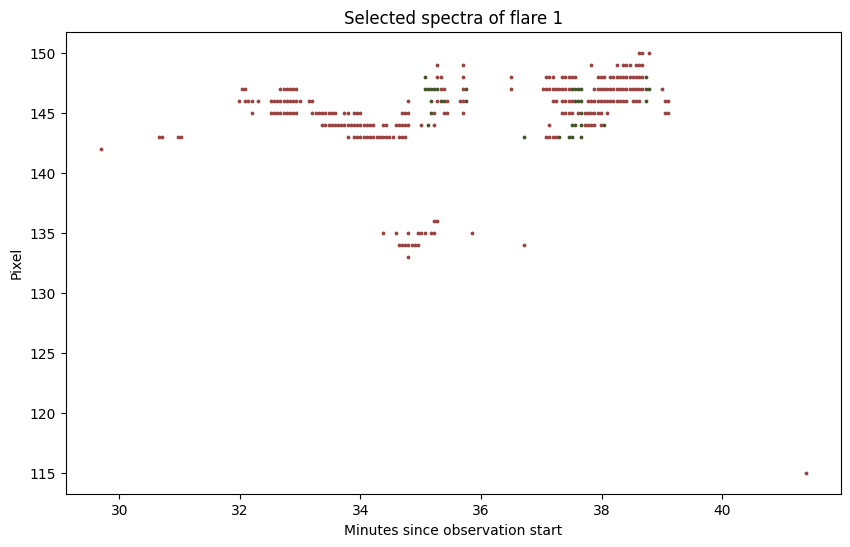

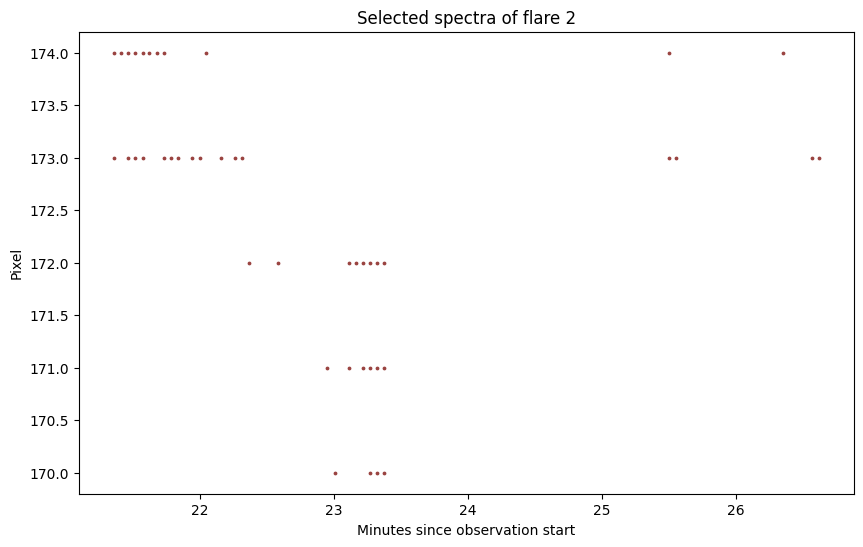

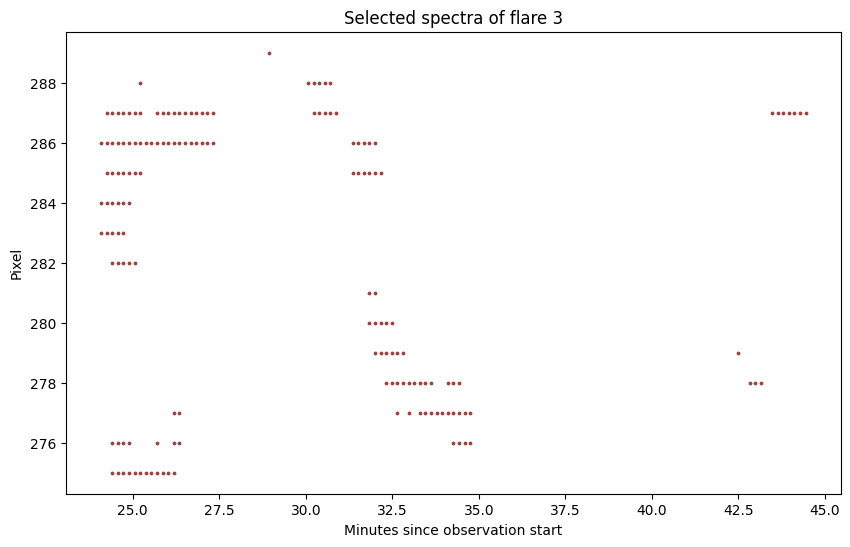

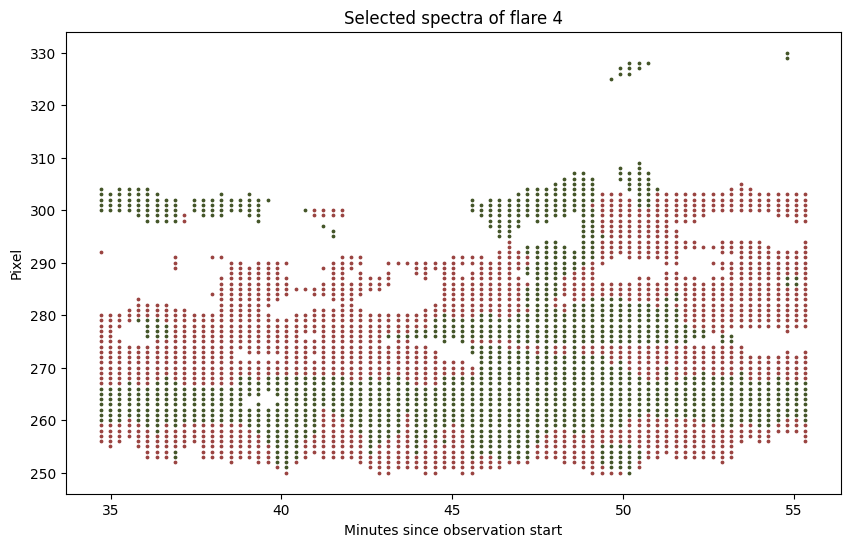

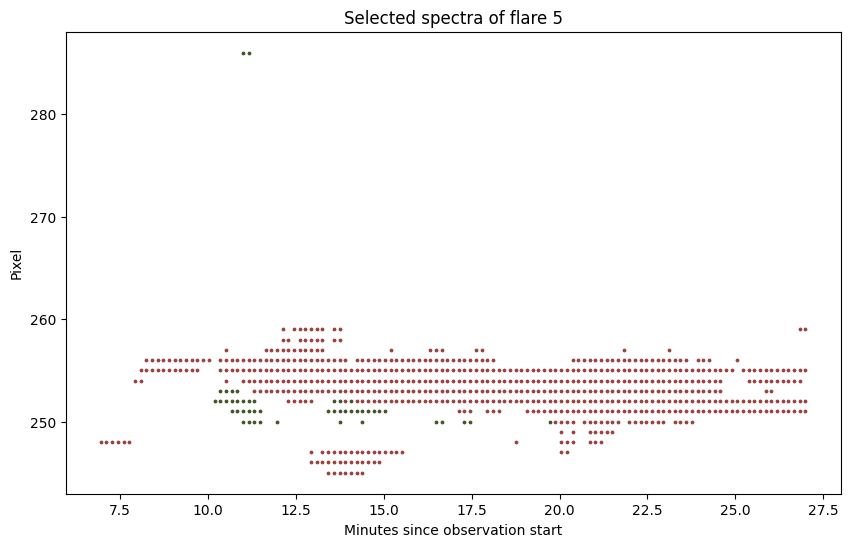

In [13]:
def Cluster_Plotting(Clusters, N, Time, t_data, y_data, labels, n_groups):
    t_newlist = []
    y_newlist = []
    Timelist = []
    #start = time.time()
    for n in range(n_groups):
        templist_t = []
        templist_y = []
        Timelist_0 = []
        for i in range(len(t_data)):
            if labels[i] == n:
                templist_t.append(t_data[i])
                templist_y.append(y_data[i])
                Timelist_0.append(Time[t_data[i]])
        t_newlist.append(templist_t)    
        y_newlist.append(templist_y)  
        Timelist.append(Timelist_0)  
    for c in range(len(Clusters)):
        n = Clusters[c]
        #plt.scatter(t_newlist[n], y_newlist[n], color=colors[n], s=3, label='C'+str(n))
        plt.scatter(Timelist[n], y_newlist[n], s = 3, color=colors[n], label='C'+str(n))
    plt.title('Selected spectra of flare '+str(N))
    plt.xlabel('Minutes since observation start')
    plt.ylabel('Pixel')
    #plt.legend()
    plt.show()
    return t_newlist, y_newlist, Timelist

#X-class
#Clusters = [1,3,5,6,9,11,13,18,19]
#Clusters = [1,2,4,5,7,8,9,11,13,14,16,17,18,19]

#M-class
#Clusters = [6,9,10,14,19]

#C-class
Clusters = [14,22]

n_groups = int(np.max(labels))+1
#colors = ["#%06x" % rdm.randint(0, 0xFFFFFF) for _ in range(n_groups)]

index = 0
t_newlist = []
y_newlist = []
Timelist = []
N = 1
for n in range(len(t_data)):
    t_newlist0, y_newlist0, Timelist0 = Cluster_Plotting(Clusters, N, Time[n], t_data[n], y_data[n], labels[index:index+len(t_data[n])], n_groups)
    t_newlist.append(t_newlist0)
    y_newlist.append(y_newlist0)
    Timelist.append(Timelist0)
    index = index + len(t_data[n])
    N+= 1


Vorher 332, Nachher 289
Vorher 1305, Nachher 1174


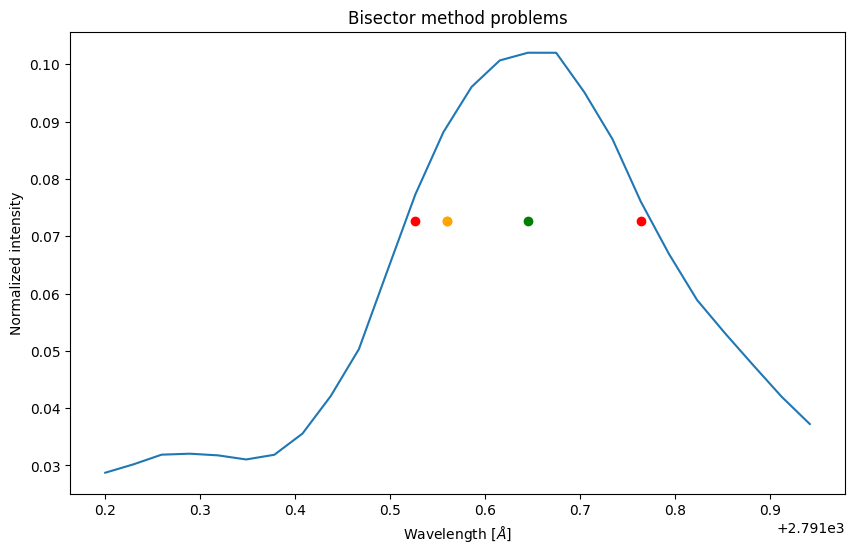

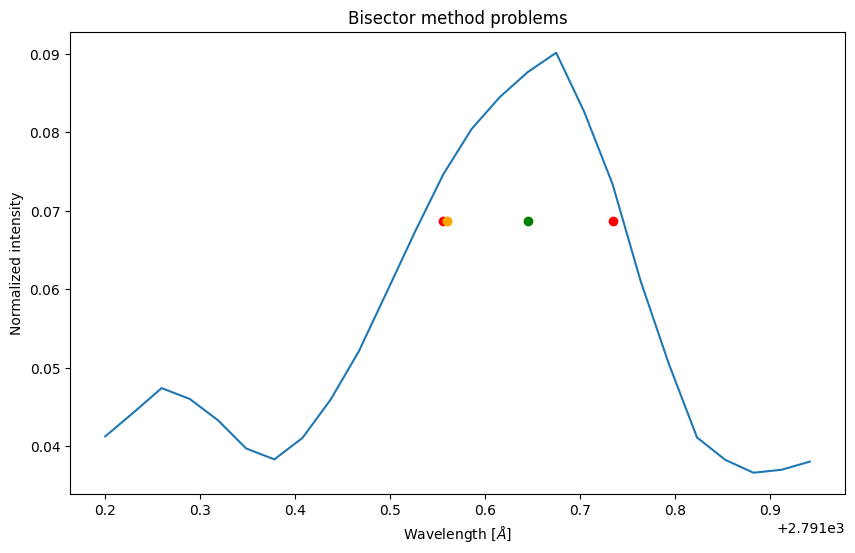

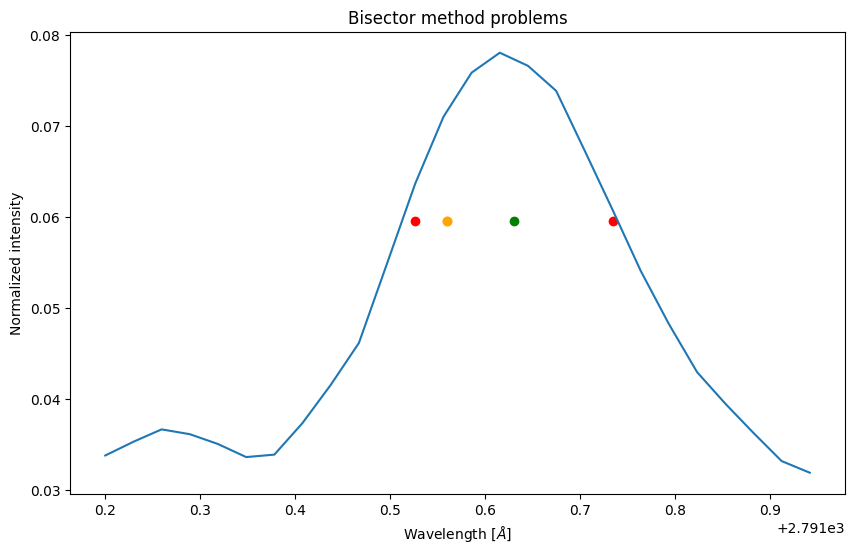

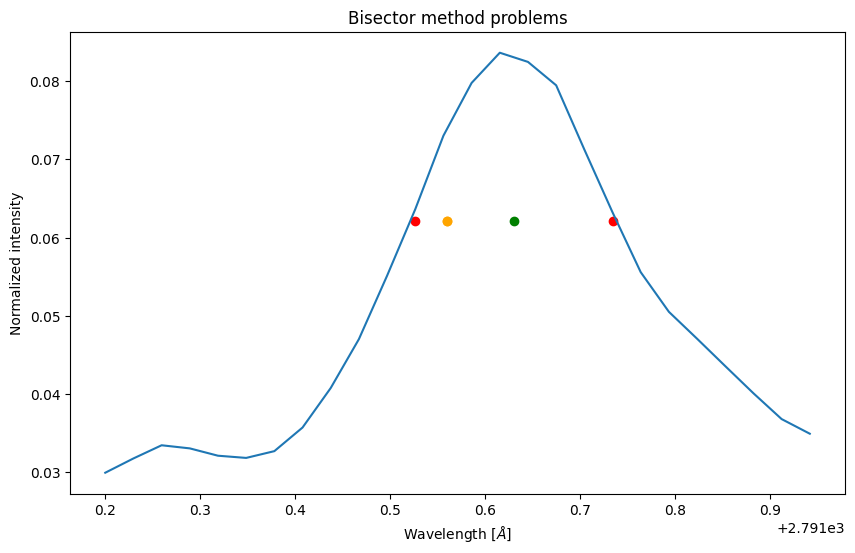

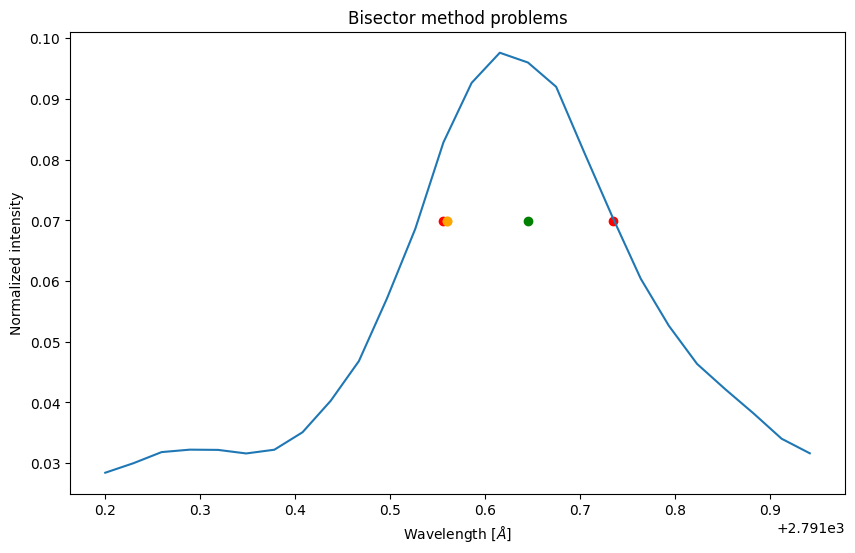

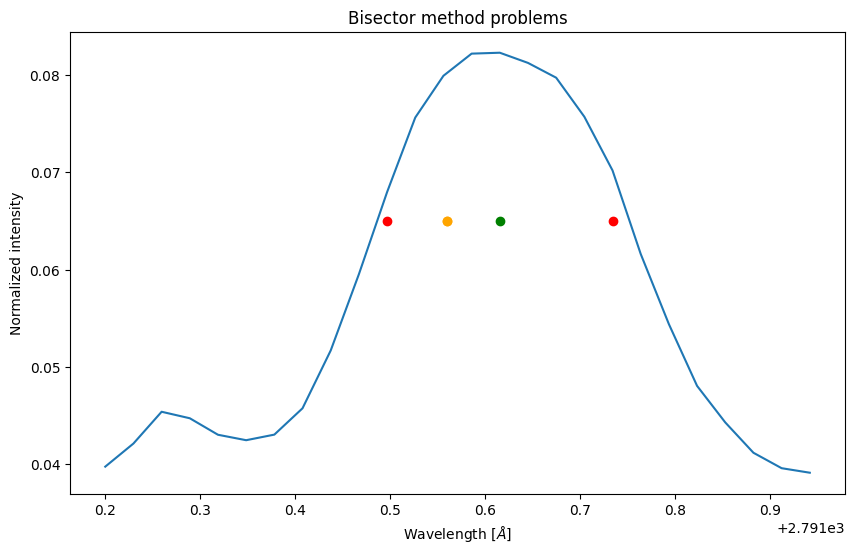

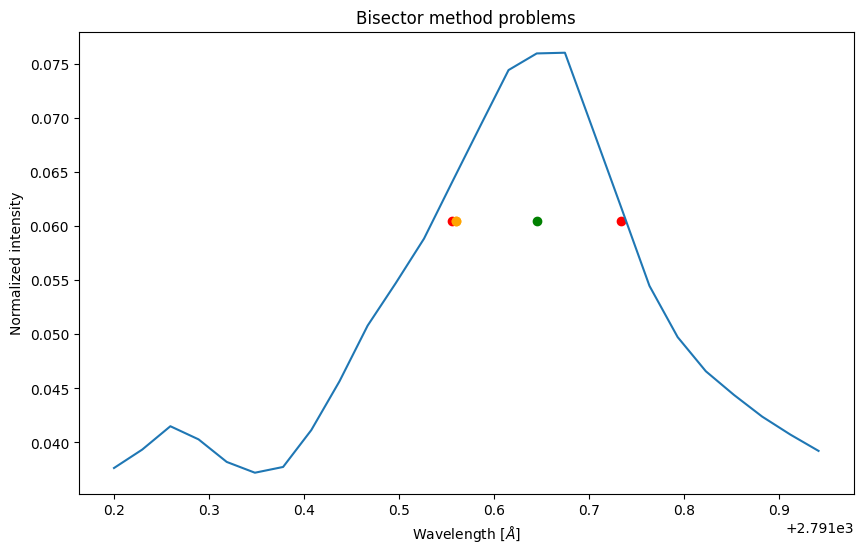

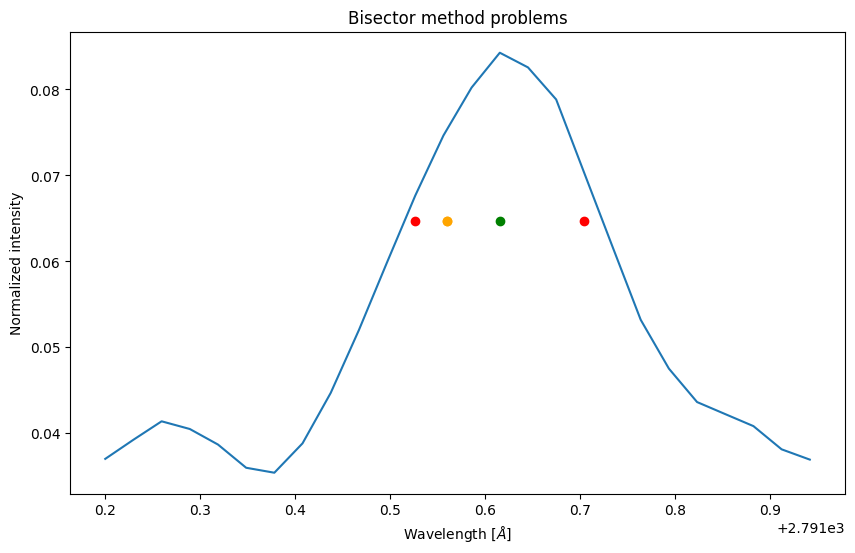

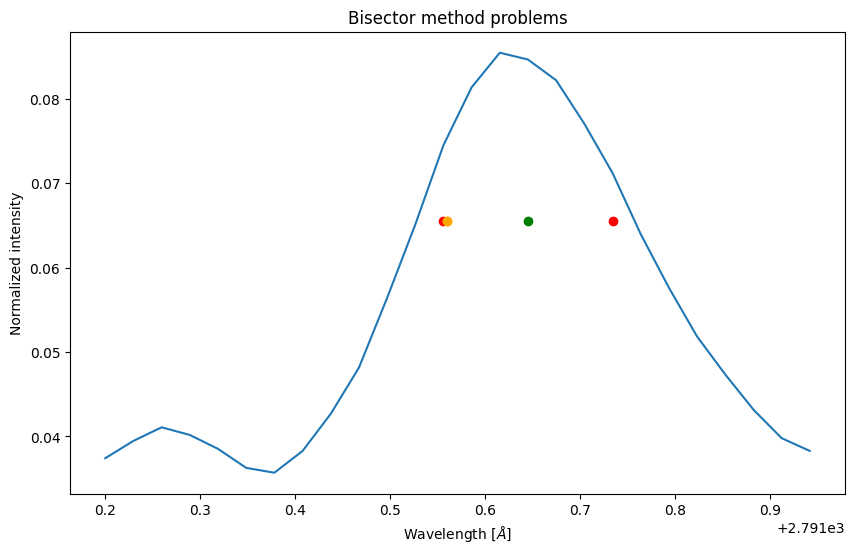

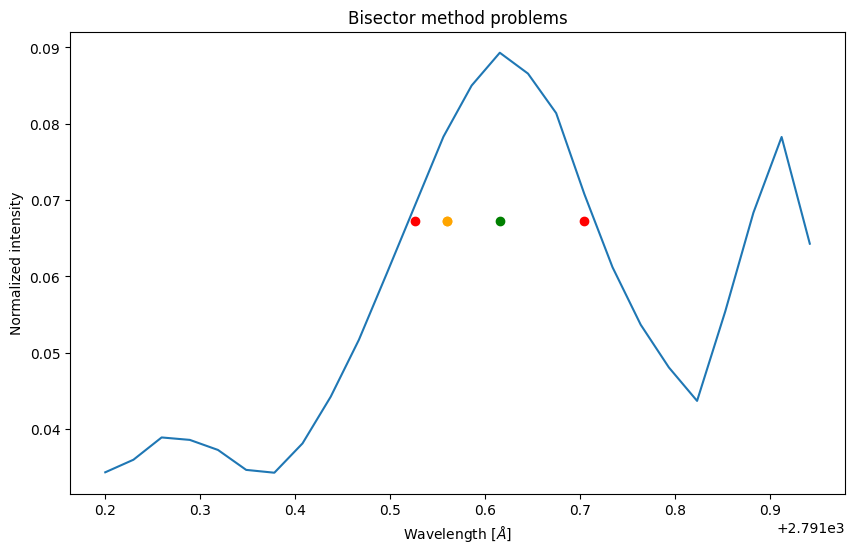

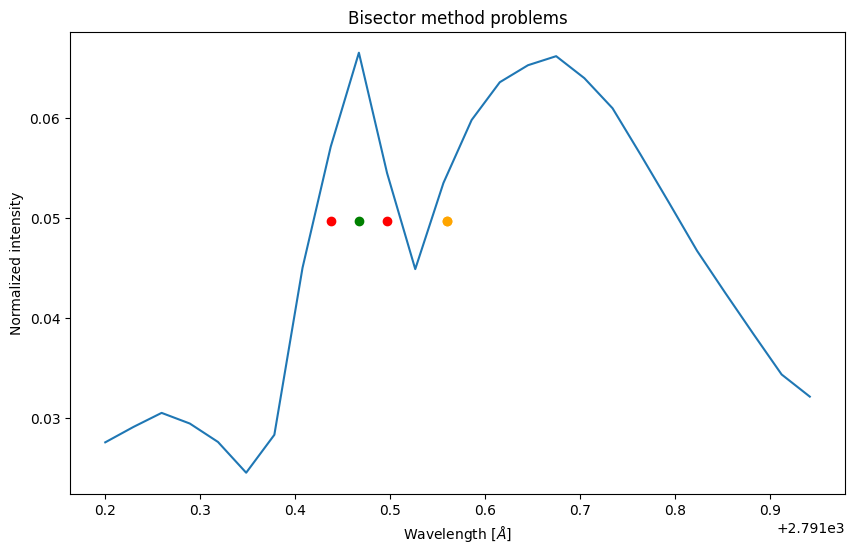

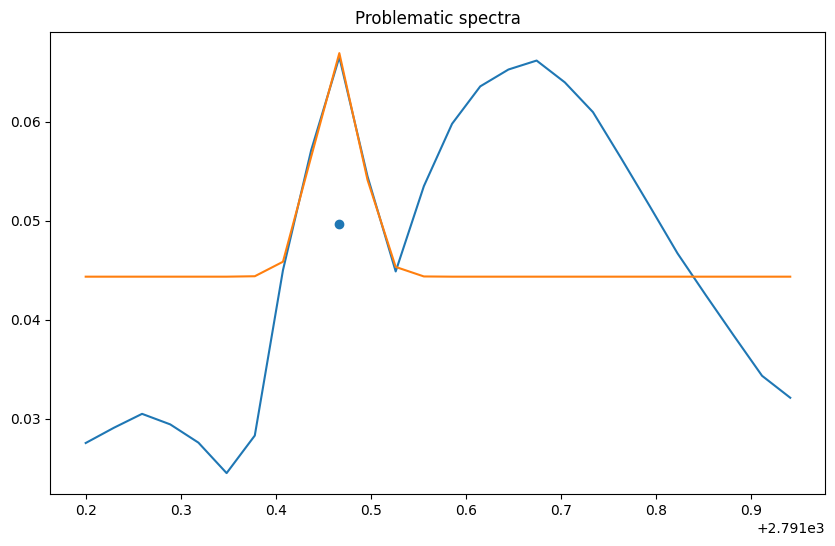

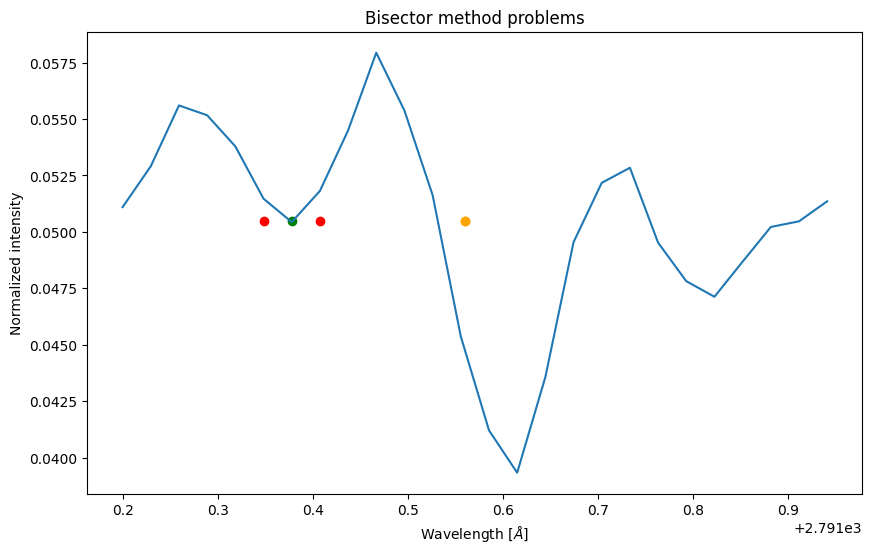

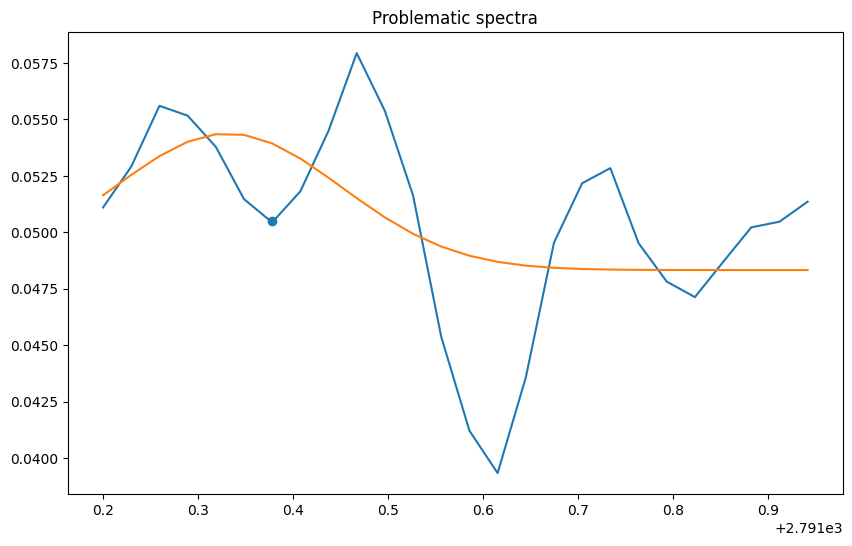

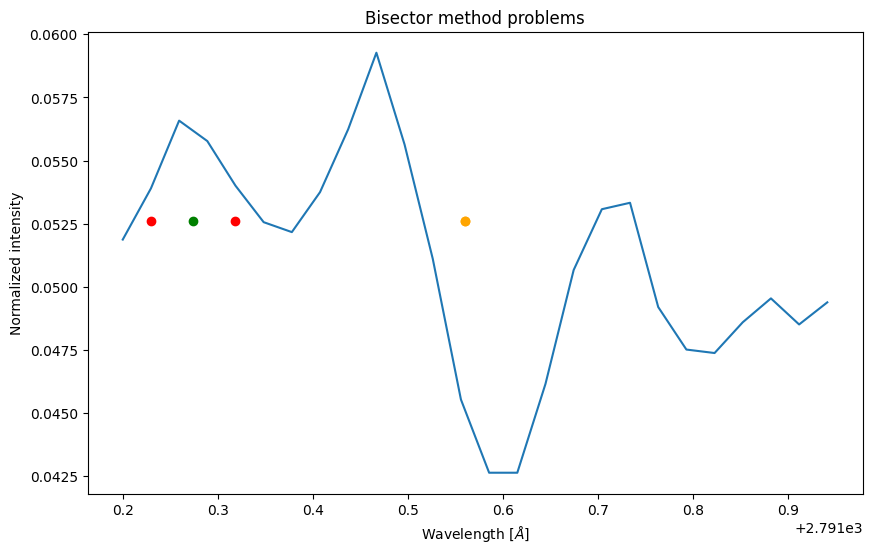

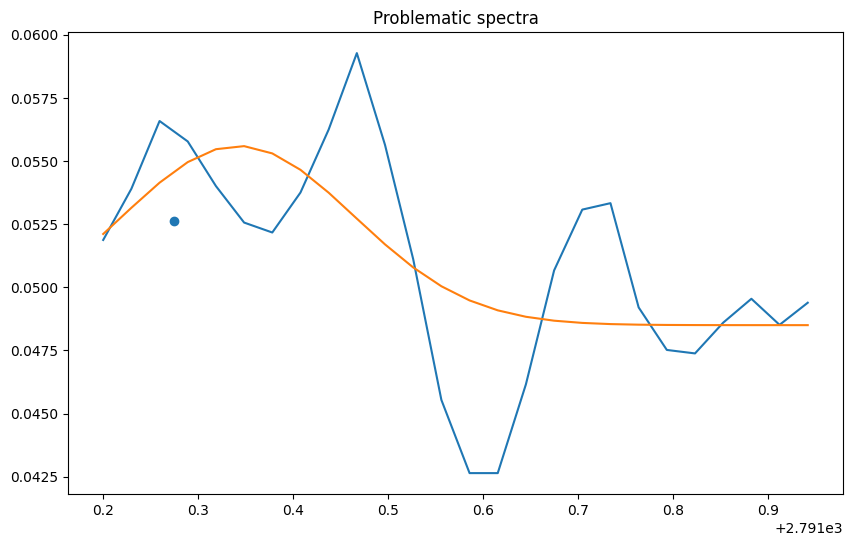

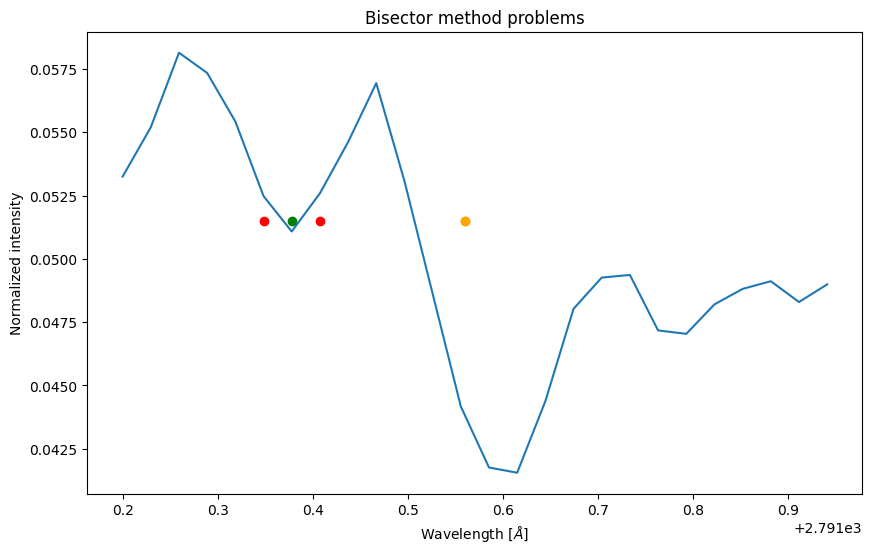

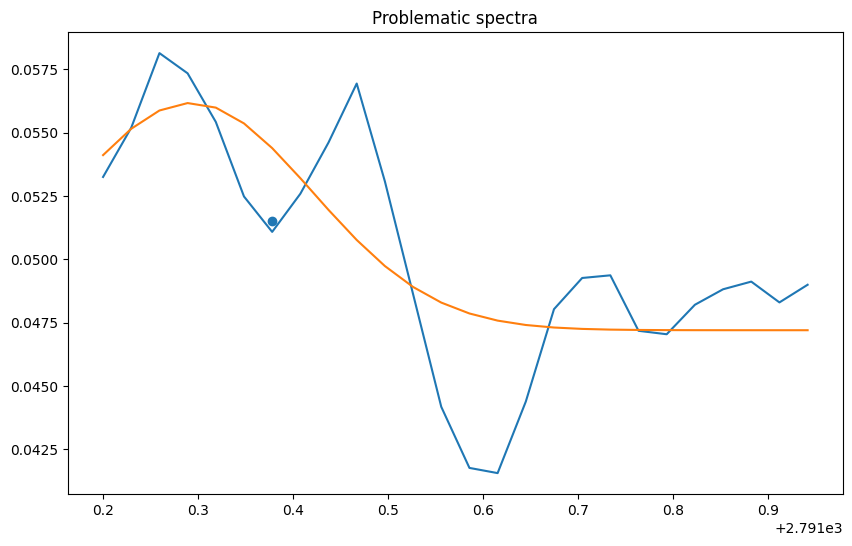

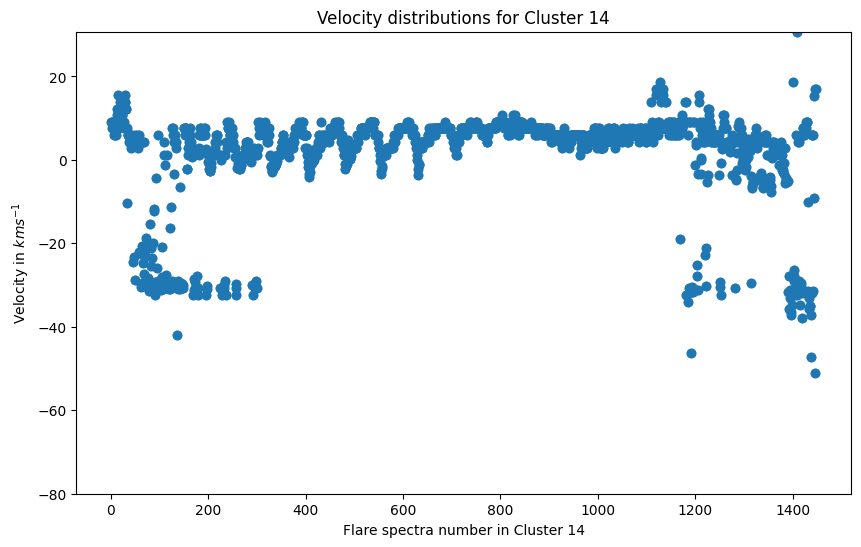

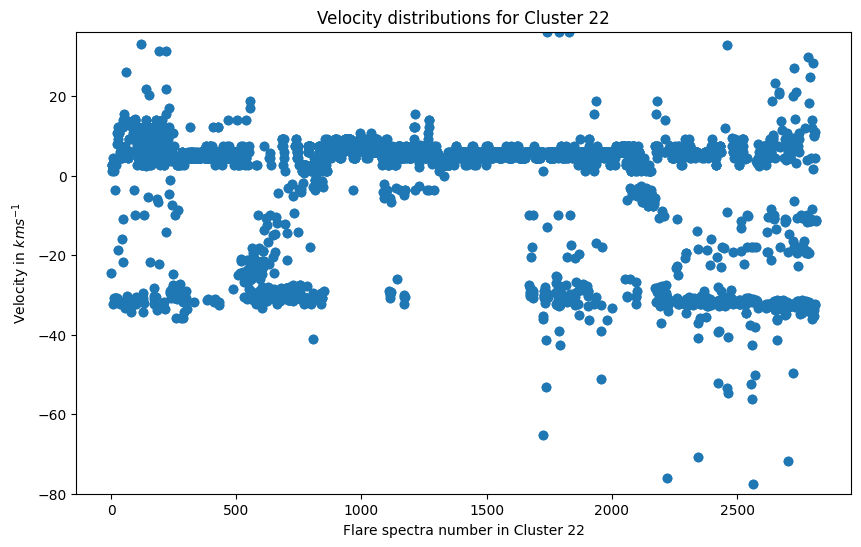

In [14]:


def gaussian(x, a, sig, mu, c):
    #Gaussian function for fitting the Magnesium 2791.56 Angstrom Subordinate line
    return a * np.exp(-(x-mu)**2/(2*sig**2)) + c


def Fitting_Function(f, x_model, y_data, a0, sig0, mu0, c0):
    #Function for fitting with exception for occasional error
    try:
        var, cov = curve_fit(f, x_model, y_data, p0 = [a0, sig0, mu0, c0])
        y_model = f(x_model, var[0], var[1], var[2], var[3])
    except RuntimeError:
        var = [a0-c0 ,sig0 ,mu0 ,c0]
        y_model = f(x_model,a0-c0 ,sig0 ,mu0 ,c0)
    return y_model, var


def v_calculation(fl_norm_X, xax_X, Clusters, lambda_min, lambda_max, lambda_0, bisec_height):
    c = 299792.458
    counter_0 = 0
    counter_1 = 0
    counter_2 = 0
    fl_min = 0
    fl_max = len(xax_X)-1
    minfound = False
    maxfound = False
    for i in range(len(xax_X)):
        if xax_X[i] >= lambda_min and minfound == False:
            fl_min = i
            minfound = True
        if xax_X[i] > lambda_max and maxfound == False:
            fl_max = i - 1
            maxfound = True
        if xax_X[i] <= lambda_0 and xax_X[i+1] >= lambda_0:
            m_j = i
    xax = xax_X[fl_min:fl_max]
    fl_norm = fl_norm_X
    dWL = xax[1] - xax[0]
    v = []
    error = []
    for C in range(len(Clusters)):
        n = Clusters[C]
        v0 = []
        Sig = []
        for i in range(len(fl_norm[n])):
            minfound = False
            maxfound = False
            spectra = fl_norm[n][i][fl_min:fl_max]
            if np.min(spectra) >= 0:
                root = bisec_height*(np.max(spectra)-np.min(spectra)) + np.min(spectra)
            else:
                root = bisec_height*np.max(spectra)
            #'''
            #root = 0.4*np.max(spectra)
            j_min = 0
            j_max = len(xax)-1
            j = 0
            '''
            while m_j-j-1 >= 0:
                if spectra[(m_j-j)] >= root and spectra[(m_j-j-1)] <= root and minfound == False:
                    j_min = m_j-j-1
                    minfound = True
                j+= 1
            
            j=0
            while m_j+j+1 < len(spectra):
                if spectra[(m_j+j)] <= root and spectra[(m_j+j-1)] >= root and maxfound == False:
                    j_max = m_j+j
                    maxfound = True
                j+= 1
            '''
            for j in range(len(spectra)-1):
                if spectra[(j)] <= root and spectra[(j+1)] >= root and minfound == False:
                    j_min = j+1
                    minfound = True
                if spectra[(j)] >= root and spectra[(j+1)] <= root and maxfound == False:
                    j_max = j
                    maxfound = True
            mWL = (xax[j_min] + xax[j_max])/2
            #plt.scatter(mWL, root, color='red')
            r = mWL/lambda_0
            v_0 = c*((r**2 - 1)/(r**2 + 1))
            if v_0 > 0 and counter_0 < 10:
                plt.figure()
                plt.plot(xax, spectra)
                plt.scatter([xax[j_min], xax[j_max]], [root, root], color='red')
                plt.scatter([lambda_0, lambda_0], [root, root], color='orange')
                plt.scatter(mWL, root, color='green')
                plt.xlabel(r'Wavelength [$\AA$]')
                plt.ylabel('Normalized intensity')
                #plt.title('n = ' +str(n) + ' i = '+str(i))
                plt.title('Bisector method problems')
                counter_0 += 1

            if v_0 < 0:
                spectra_new, var = Fitting_Function(gaussian, xax, spectra, np.max(spectra[m_j - 10:m_j+10])-np.min(spectra[m_j - 10:m_j+10]), (xax[j_max]- xax[j_min])/2, mWL, np.min(spectra[m_j - 10:m_j+10]))
                mWL_2 = var[2]
                r = mWL_2/lambda_0
                v_0 = c*((r**2 - 1)/(r**2 + 1))
                counter_1 += 1
                if counter_1 < 5:
                    plt.figure()
                    plt.plot(xax, spectra)
                    plt.scatter([xax[j_min], xax[j_max]], [root, root], color='red')
                    plt.scatter([lambda_0, lambda_0], [root, root], color='orange')
                    plt.scatter(mWL, root, color='green')
                    plt.xlabel(r'Wavelength [$\AA$]')
                    plt.ylabel('Normalized intensity')
                    #plt.title('n = ' +str(n) + ' i = '+str(i))
                    plt.title('Bisector method problems')

            sig = c*dWL*(4*mWL*lambda_0**2)/(mWL**2 + lambda_0**2)*10**(-10)
            v0.append(v_0)
            Sig.append(sig)
            if v_0 < 0:
                counter_2 += 1
                if counter_2 < 5:
                    plt.figure()
                    plt.plot(xax, spectra)
                    plt.plot(xax, spectra_new)
                    plt.scatter(mWL, root)
                    #plt.title('n = ' +str(n) + ' i = '+str(i))
                    plt.title('Problematic spectra')
            '''
            if v_0 > 25:
                plt.figure()
                plt.plot(xax, spectra)
                #plt.plot(xax, spectra_new)
                plt.scatter(mWL, root)
                #plt.title('n = ' +str(n) + ' i = '+str(i))
                plt.title('Velocity outlier spectra')
            '''
        v.append(v0) 
        error.append(Sig)   
        #v.sort()
        #print(v)
        plt.figure()
        plt.scatter(np.linspace(1, len(fl_norm_X[n]), len(fl_norm_X[n])), v0)
        plt.errorbar(np.linspace(1, len(fl_norm_X[n]), len(fl_norm_X[n])), v0, yerr = Sig, fmt='o')
        plt.title('Velocity distributions for Cluster ' + str(n))
        plt.xlabel('Flare spectra number in Cluster ' + str(n))
        plt.ylabel(r'Velocity in $kms^{-1}$')
        if np.min(v0) < -80:
            plt.ylim(-80,np.max(v0))
        print('Vorher ' + str(counter_1) + ', Nachher ' + str(counter_2))
    plt.show()
    return v

#bisec_height = Height of bisection from 0 - 1

v = v_calculation(fl_norm, xax, Clusters, 2791.2, 2792, 2791.56, 0.6)

#v = v_calculation(fl_norm, xax, Clusters, 2791, 2792, 2791.56)



In [15]:
def Acquiring_newlist(t_data, y_data, labels, n_groups):
    t_newlist = []
    y_newlist = []
    for n in range(n_groups):
        templist_t = []
        templist_y = []
        for i in range(len(t_data)):
            if labels[i] == n:
                templist_t.append(t_data[i])
                templist_y.append(y_data[i])
        t_newlist.append(templist_t)    
        y_newlist.append(templist_y)  
    return t_newlist, y_newlist


index = 0
t_newlist = []
y_newlist = []
for n in range(len(path)):
    t_newlist0, y_newlist0 = Acquiring_newlist(t_data[n], y_data[n], labels[index:index+len(t_data[n])], len(fl_norm))
    t_newlist.append(t_newlist0)
    y_newlist.append(y_newlist0)
    index = index + len(t_data[n])

    

In [15]:
def v_Sorting(v, t_newlist, Clusters, index):
    v_sort = []
    for c in range(len(Clusters)):
        n = Clusters[c]
        v_temp= v[c][int(index[0][c]):int(index[0][c])+len(t_newlist[n])]
        v_sort.append(v_temp)
        index[0][c] += len(t_newlist[n])
    return v_sort, index

v_sort = []
index = np.zeros((1,len(v)))

for t in range(len(t_newlist)):
    v_sort0, index0 = v_Sorting(v, t_newlist[t], Clusters, index)
    v_sort.append(v_sort0)
    index0 = index



In [17]:
def vlabels(v):
    v_labels = []
    for c in range(len(v)):
        label = []
        for i in range(len(v[c])):
            if v[c][i] >= 0 and v[c][i] <= 5: 
                label.append(int(0))
            if v[c][i] >= 5 and v[c][i] <= 10:
                label.append(int(1))
            if v[c][i] >= 10 and v[c][i] <= 20:
                label.append(int(2))
            if v[c][i] >= 20 and v[c][i] <= 30:
                label.append(int(3))
            if v[c][i] < 0:
                label.append(int(4))
            if v[c][i] > 30:
                label.append(int(5))
        v_labels.append(label)
    return v_labels

v_labels = []
for n in range(len(v_sort)):
    v_labels0 = vlabels(v_sort[n])
    v_labels.append(v_labels0)

for o in range(3):
    for c in range(len(v_labels[o])):
        n = Clusters[c]
        print(len(v_labels[o][c]), len(t_newlist[o][n]))



10906 10906
4756 4756
1119 1119
2070 2070
2892 2892
8251 8251
303 303
2806 2806
1277 1277
157 157
1198 1198
30 30
39 39
21 21
12 12
939 939
542 542
1 1
2314 2314
970 970
1136 1136
2874 2874
1425 1425
1787 1787
5159 5159
8186 8186
104 104


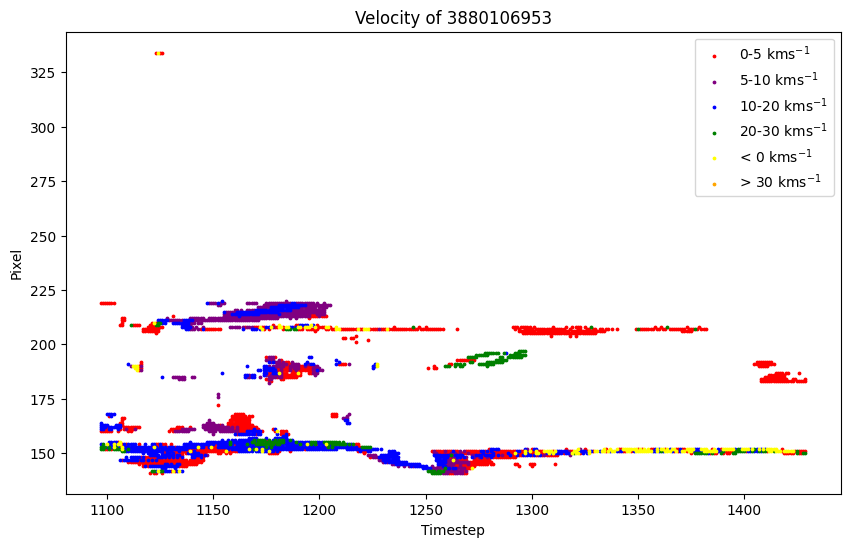

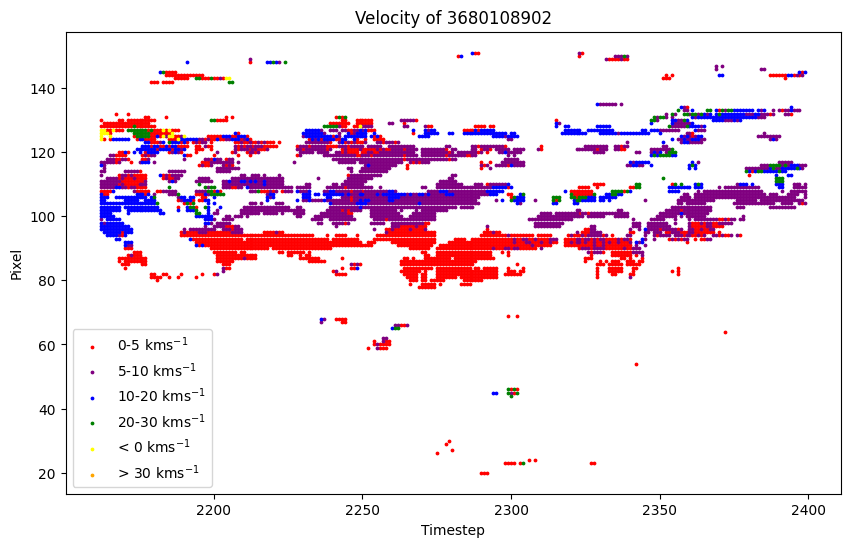

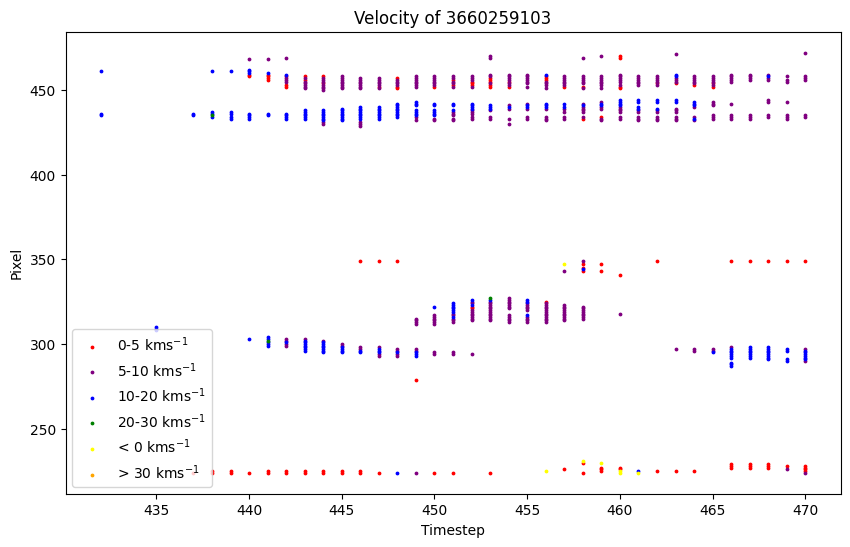

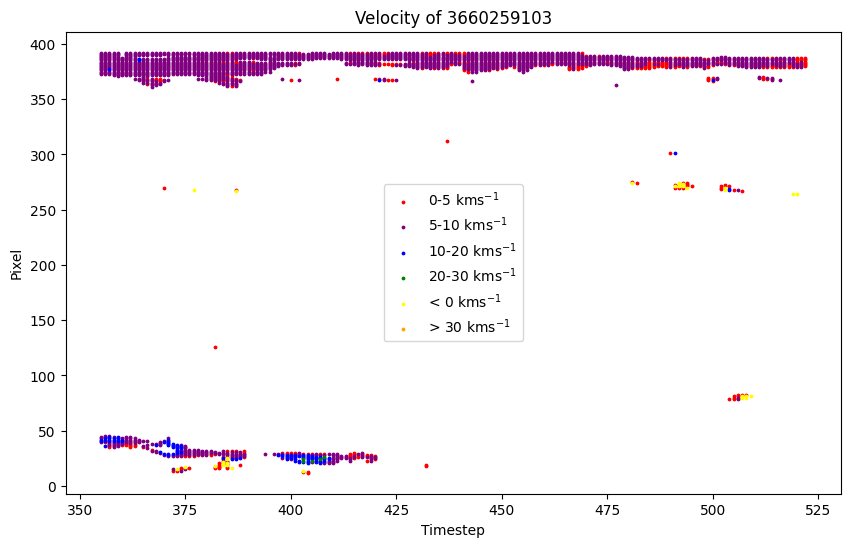

In [9]:
def v_Plotting(path, v_labels, Clusters, t_newlist, y_newlist, amtlabels):
    colors = ['red', 'purple', 'blue', 'green', 'yellow', 'orange']
    txtlabels = [r'0-5 kms$^{-1}$', r'5-10 kms$^{-1}$', r'10-20 kms$^{-1}$', r'20-30 kms$^{-1}$', r'< 0 kms$^{-1}$', r'> 30 kms$^{-1}$']
    t_list = []
    y_list = []
    for l in range(amtlabels):
        t_temp = []
        y_temp = []
        for c in range(len(v_labels)):
            n = Clusters[c]
            for i in range(len(v_labels[c])):
                if v_labels[c][i] == l:
                    t_temp.append(t_newlist[n][i])
                    y_temp.append(y_newlist[n][i])
        t_list.append(t_temp)
        y_list.append(y_temp)
    for l in range(amtlabels):
        #print(len(t_lis), len(y_newlist[n]), len(v[c]))
        plt.scatter(t_list[l], y_list[l], color=colors[l], label=txtlabels[l], s=3)
    plt.title('Velocity of '+str(path[16:]))
    plt.xlabel('Timestep')
    plt.ylabel('Pixel')
    plt.legend()
    plt.show()


#plt.scatter(t_newlist[0][1], y_newlist[0][1], color='blue')

for n in range(len(t_newlist)):
    v_Plotting(path[n], v_labels[n], Clusters, t_newlist[n], y_newlist[n], 6)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


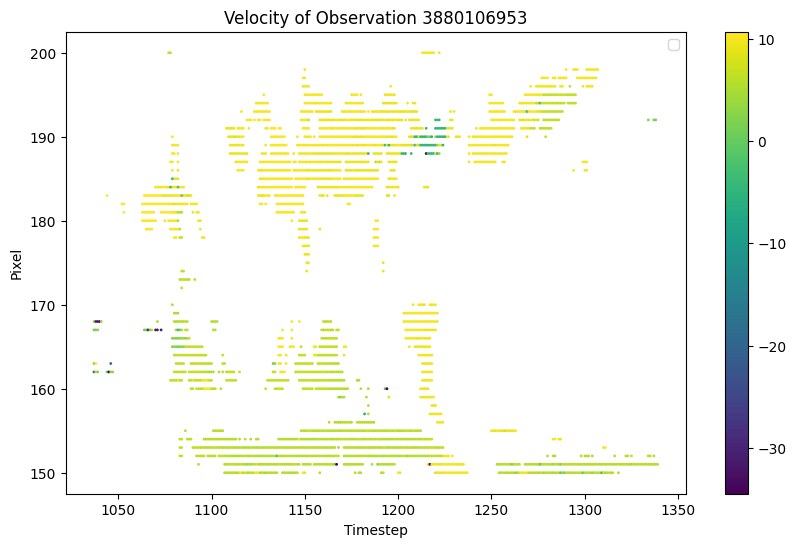

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


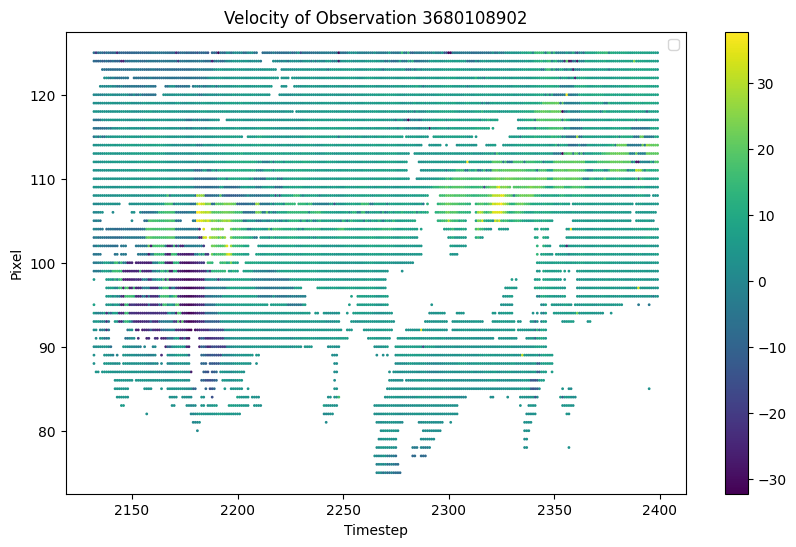

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


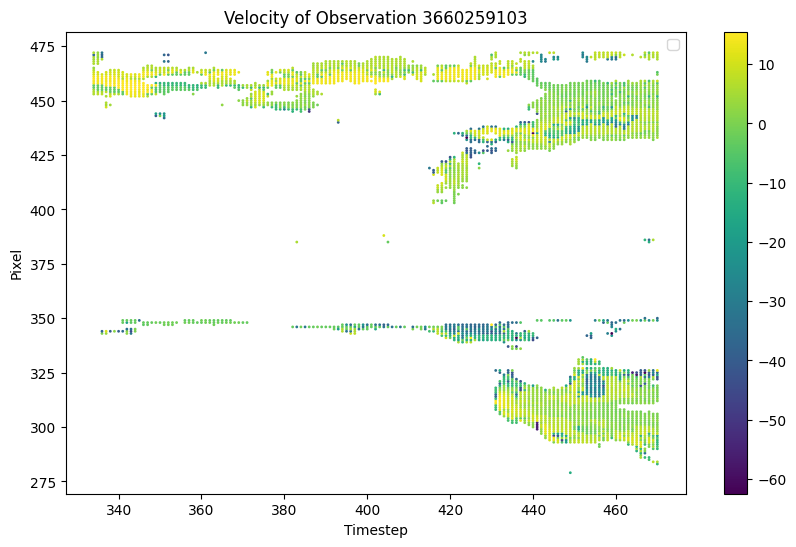

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


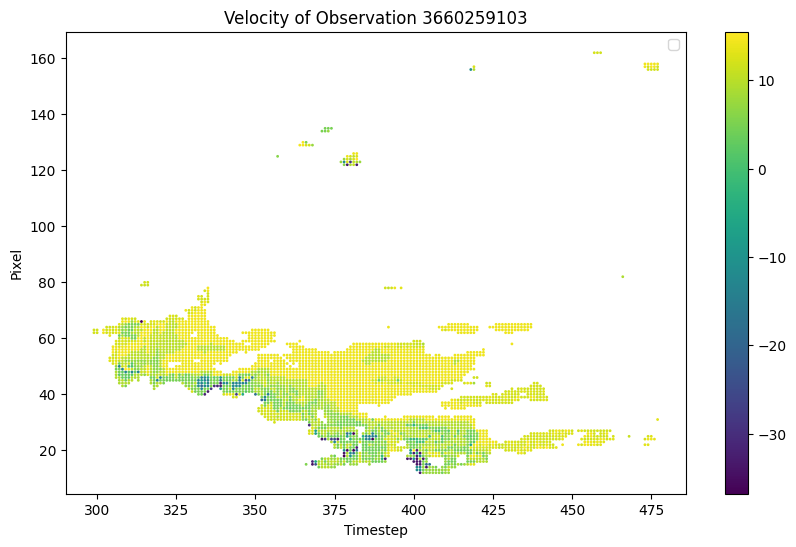

In [8]:
def color_plotting(path, v_sort, Clusters, t_newlist, y_newlist):
    for c in range(len(Clusters)):
        n = Clusters[c]
        plt.scatter(t_newlist[n], y_newlist[n], c=v_sort[c], s=1, cmap='viridis')
        #print(np.min(v_sort[c]), np.max(v_sort[c]))
    plt.title('Velocity of Observation '+str(path[16:]))
    plt.colorbar()
    plt.xlabel('Timestep')
    plt.ylabel('Pixel')
    plt.legend()
    plt.show()


#plt.scatter(t_newlist[0][1], y_newlist[0][1], color='blue')

for n in range(len(t_newlist)):
    color_plotting(path[n], v_sort[n], Clusters, t_newlist[n], y_newlist[n])



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


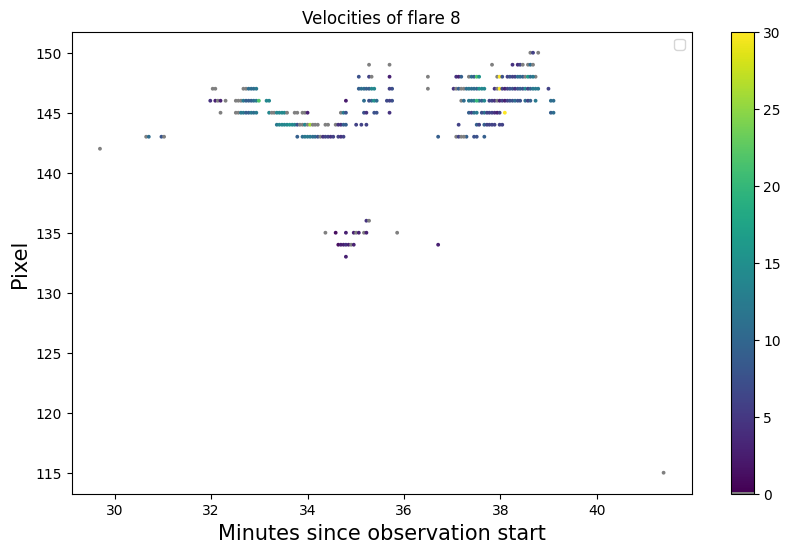

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


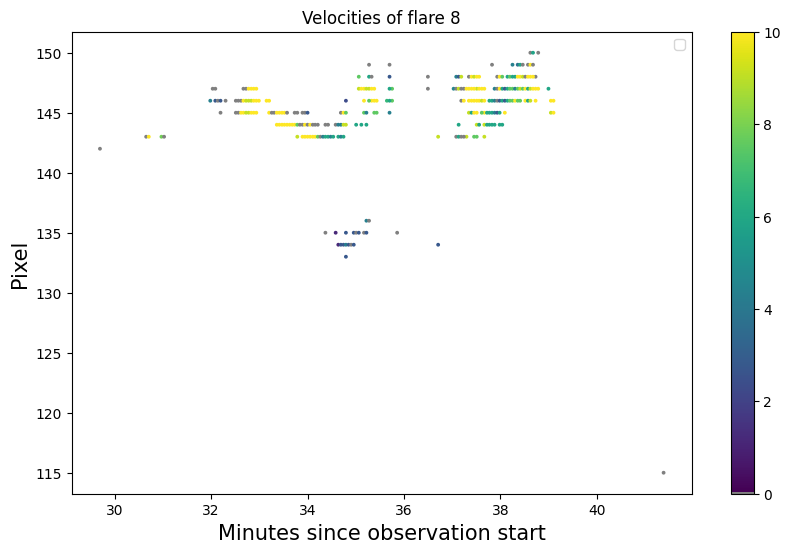

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


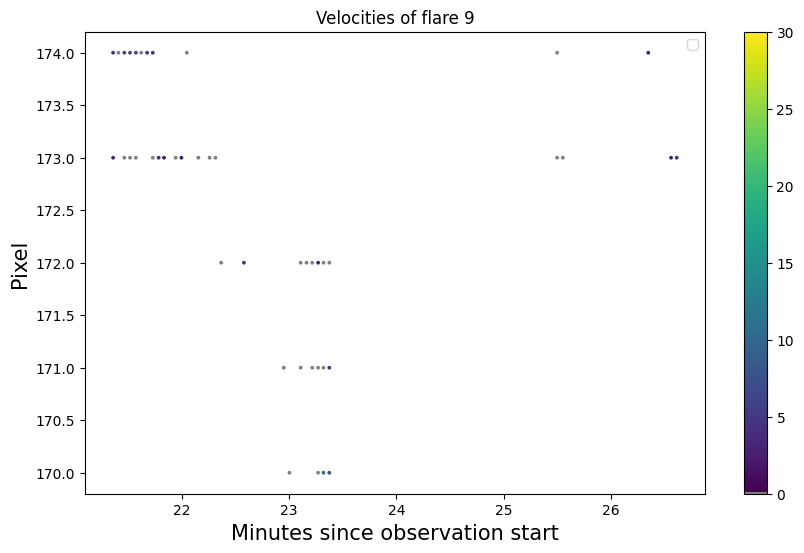

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


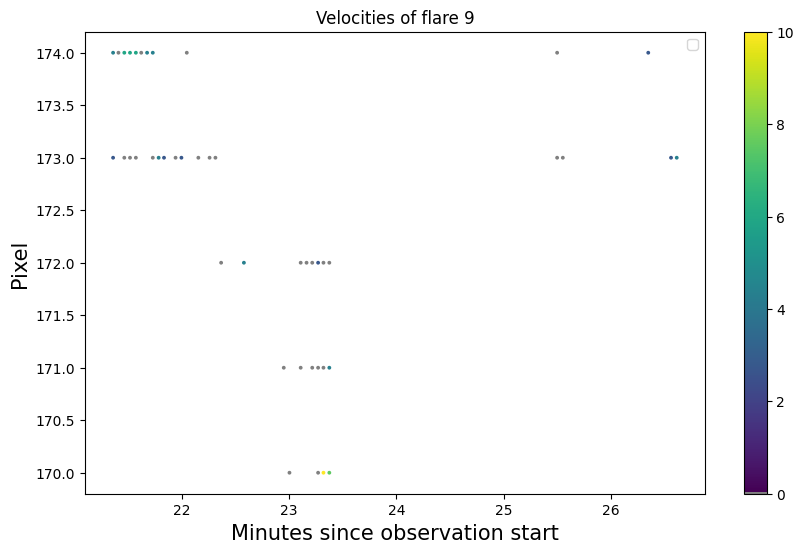

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


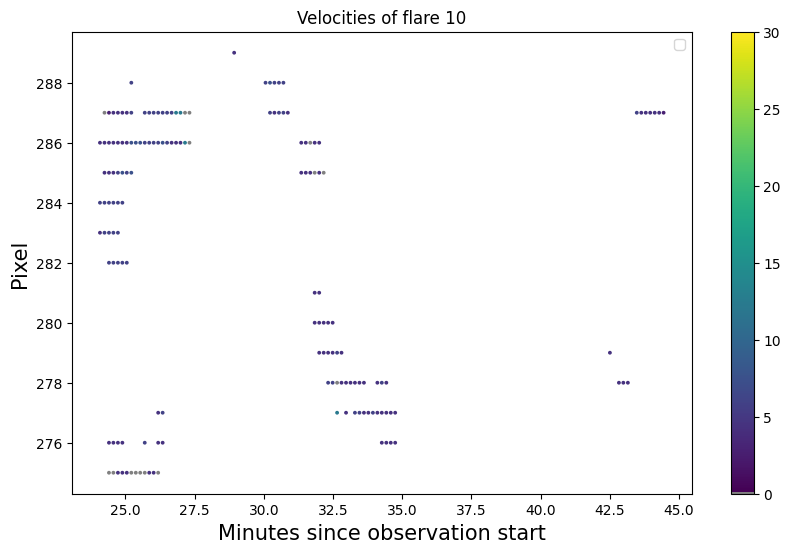

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


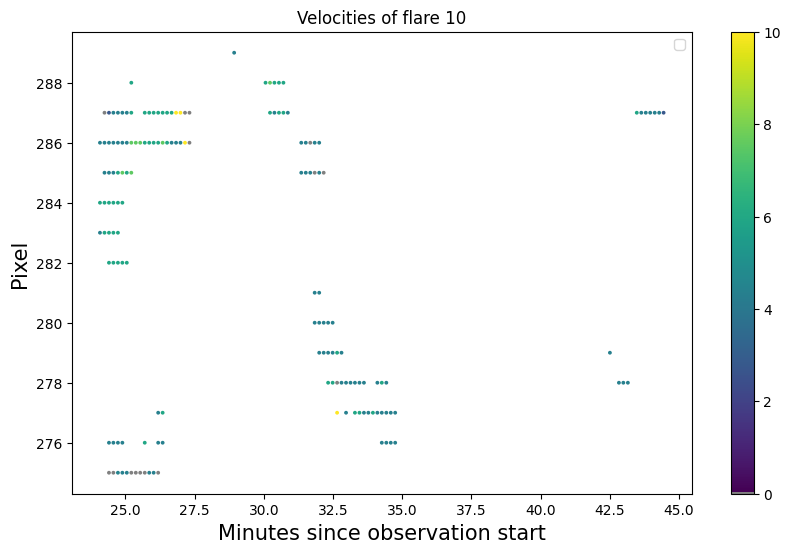

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


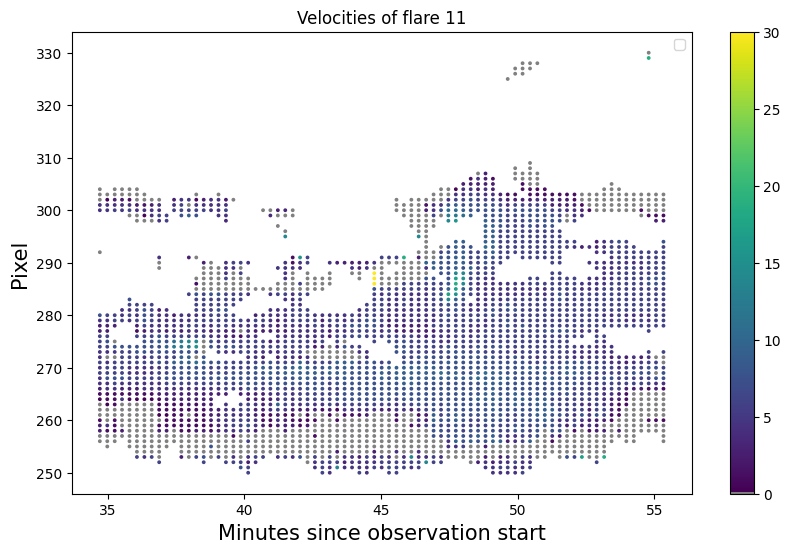

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


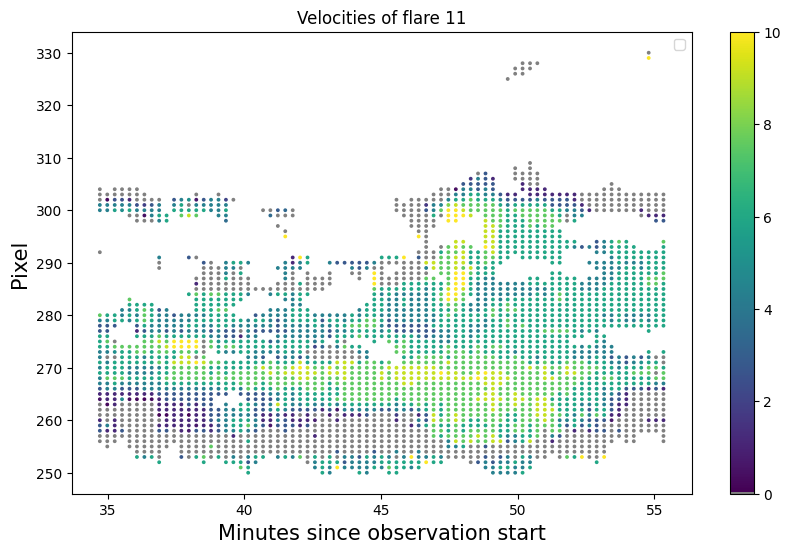

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


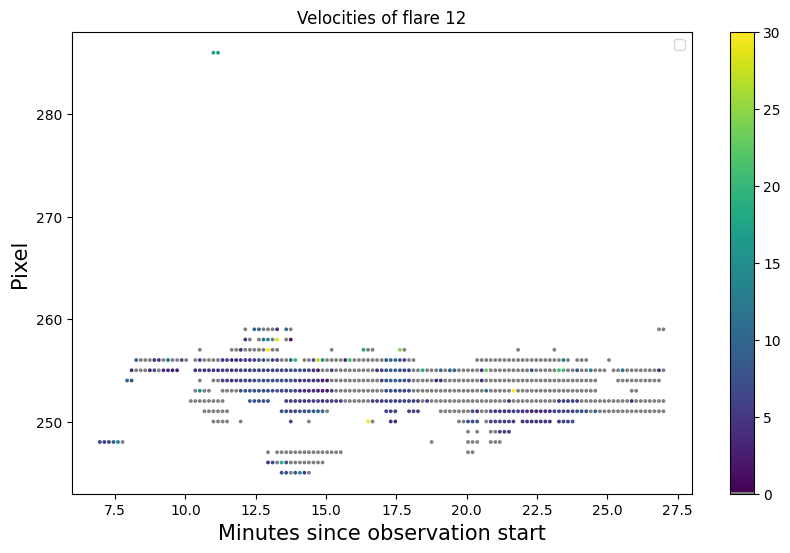

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


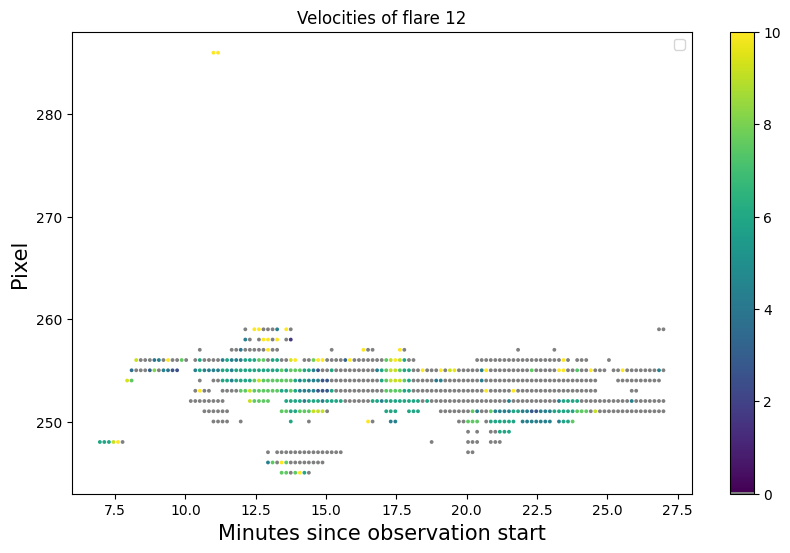

In [17]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap


def color_plotting(N, max, v_sort, Clusters, y_newlist, Timelist):
    '''
    max = 0
    for C in range(len(Clusters)):
        if np.max(v[C]) > max:
            max = np.max(v[C])
            c_max = C
    '''     
    for C in range(len(Clusters)):
        n = Clusters[C]
        #plt.scatter(t_newlist[n], y_newlist[n], c=v_sort[c], s=3, cmap='Greys')
        viridis = plt.get_cmap('viridis', 256)
        colors = np.vstack((
            [0.5, 0.5, 0.5, 1],      # Grey for values below 0
            viridis(np.linspace(0, 1, 256))  # 'viridis' colormap from 0 to 5
        ))
        new_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
        #v_clipped = np.clip(z, 0, 1000)
        #below_zero = z < 0
        norm = mcolors.Normalize(vmin=0, vmax=max)
        #scatter = plt.scatter(t_newlist[n], y_newlist[n], c=v_sort[C], s=3, cmap=new_cmap, norm=norm)
        scatter = plt.scatter(Timelist[n], y_newlist[n], c=v_sort[C], s=3, cmap=new_cmap, norm=norm)
        #print(np.min(v_sort[c]), np.max(v_sort[c]))
        if C == 0:
            plt.colorbar(scatter)
    plt.title('Velocities of flare '+str(N))
    #plt.xlabel('Timestep')
    plt.xlabel('Minutes since observation start', fontsize=15)
    plt.ylabel('Pixel', fontsize=15)
    plt.legend()
    plt.show()


N = 8
for n in range(len(t_newlist)):
    color_plotting(N, 30, v_sort[n], Clusters, y_newlist[n], Timelist[n])
    color_plotting(N, 10, v_sort[n], Clusters, y_newlist[n], Timelist[n])
    N+= 1



In [28]:
print(len(v_sort))

5


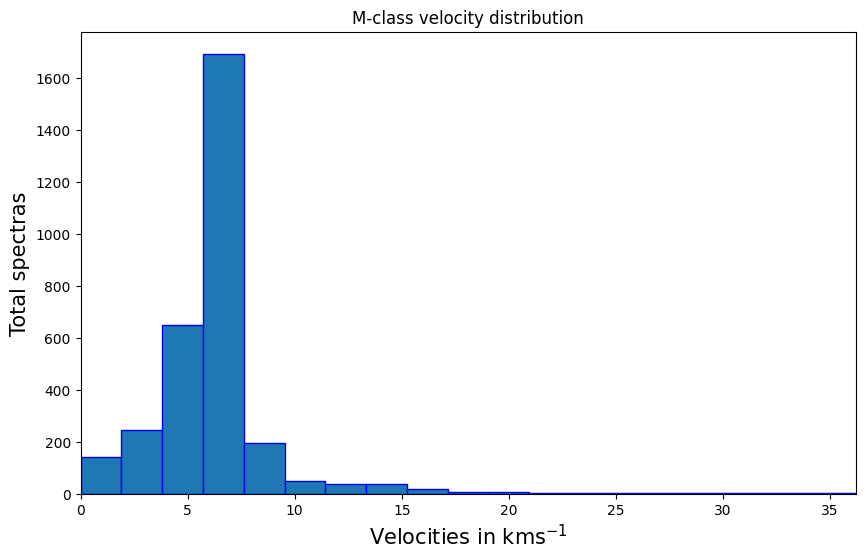

0 grösser als 30
0 kleiner als 0


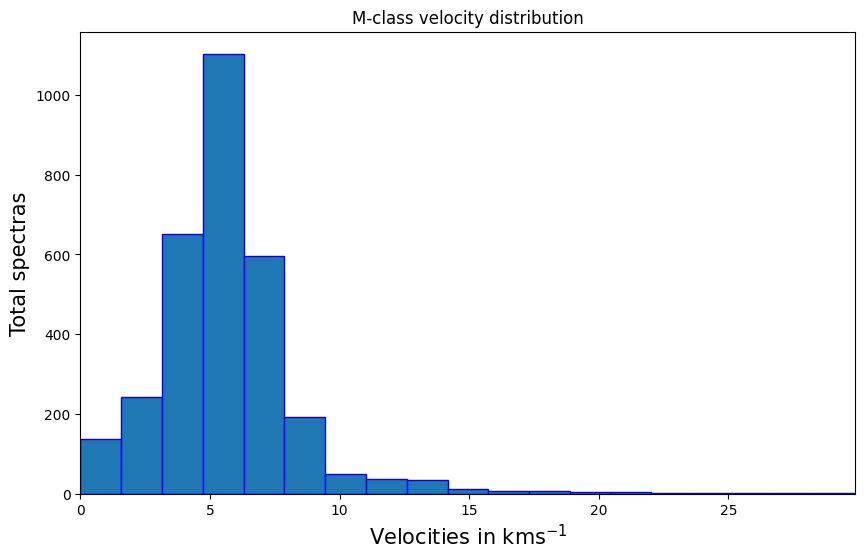

8 grösser als 30
1174 kleiner als 0
[36.18842438554537, 36.18842438554537, 36.18842438554537, 33.00360518652095, 32.8442317824761, 31.411182896386073, 31.411182896386073, 30.707247787194255, 29.897641252770075, 28.271560797864186, 27.12042278567626, 25.985614940393006, 24.680383582831297, 23.184905765934683, 21.856471488255384, 21.856471488255384, 21.02209559151724, 20.94879227633742, 20.404676230926803, 20.263989975635443, 19.916652126099812, 18.87711857681926, 18.671500002722205, 18.671500002722205, 18.671500002722205, 18.671500002722205, 18.671500002722205, 18.22724179321527, 17.07900156931599, 17.07900156931599, 17.07900156931599, 17.07900156931599, 17.07900156931599, 17.07900156931599, 17.07900156931599, 15.486494675516605, 15.486494675516605, 15.486494675516605, 15.486494675516605, 15.486494675516605, 15.486494675516605, 15.486494675516605, 15.486494675516605, 15.486494675516605, 15.486494675516605, 15.314242379047476, 14.313725562107098, 14.157868198259477, 13.993105767691024, 1

In [19]:
def Histogram(v, amount):
    velocity = []
    counter_max = 0
    counter_min = 0
    for n in range(len(v)):
        for c in range(len(v[n])):
            if v[n][c] >= 0:
                velocity.append(v[n][c])
    bins = np.linspace(np.min(velocity), np.max(velocity), amount)
    plt.hist(velocity, bins=bins, edgecolor='blue')
    plt.title('M-class velocity distribution')
    plt.xlabel(r'Velocities in kms$^{-1}$', fontsize=15)
    plt.ylabel('Total spectras', fontsize=15)
    plt.xlim(0, np.max(velocity))
    plt.show()
    print(str(counter_max) + ' grösser als 30')
    print(str(counter_min) + ' kleiner als 0')
    return velocity

def Histogram2(v, amount):
    velocity = []
    counter_max = 0
    counter_min = 0
    for n in range(len(v)):
        for c in range(len(v[n])):
            if v[n][c] >= 0 and v[n][c] <= 30:
                velocity.append(v[n][c])
            if v[n][c] >= 30:
                counter_max += 1
            if v[n][c] < 0:
                counter_min += 1
    bins = np.linspace(np.min(velocity), np.max(velocity), amount)
    plt.hist(velocity, bins=bins, edgecolor='blue')
    plt.title('M-class velocity distribution')
    plt.xlabel(r'Velocities in kms$^{-1}$', fontsize=15)
    plt.ylabel('Total spectras', fontsize=15)
    plt.xlim(0, np.max(velocity))
    plt.show()
    print(str(counter_max) + ' grösser als 30')
    print(str(counter_min) + ' kleiner als 0')
    return velocity


velo = Histogram(v, 20)

velo2 = Histogram2(v, 20)

velo.sort(reverse = True)
print(velo)



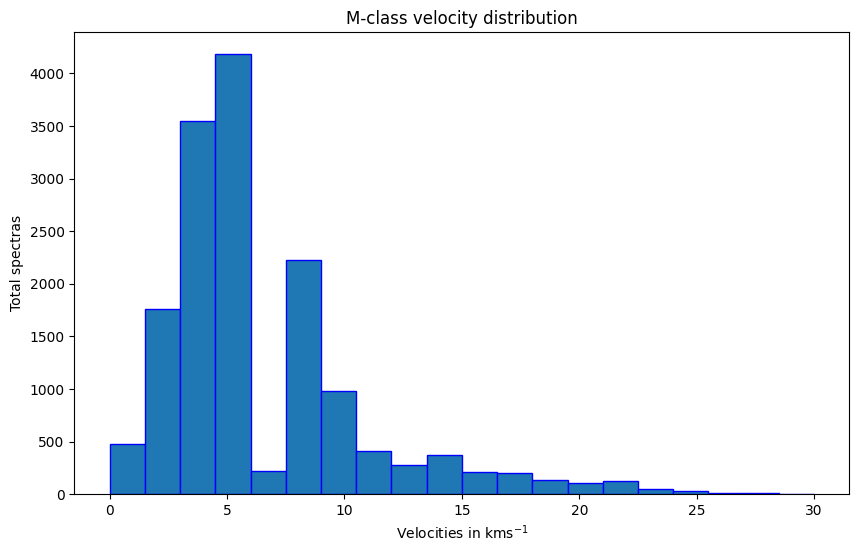

262


In [62]:
def Histogram(v):
    velocity = []
    for n in range(len(v)):
        for c in range(len(v[n])):
            #if v[n][c] >= 0:
            velocity.append(v[n][c])
    xmin = 0
    xmax = 30
    bins = 20
    plt.hist(velocity, bins=bins, edgecolor='blue', range=(xmin, xmax))
    plt.title('M-class velocity distribution')
    plt.xlabel(r'Velocities in kms$^{-1}$')
    plt.ylabel('Total spectras')
    #plt.xlim(0, 30)
    plt.show()
    return velocity

velocity = Histogram(v)

counter = 0
for i in range(len(velocity)):
    if velocity[i] >= 3 and velocity[i] <= 4:
        counter += 1
print(counter)